# Machi Koro AI

### I'm currently working on implementing a neural network on top of my base game implementation, but for now here are some stats from simulating AI players that make completely random decisions (i.e. cards to buy (or pass), players to take money from if given a choice, whether to roll one or two dice)

In [89]:
from MachiKoro import MachiKoro, game_db

In [35]:
game = MachiKoro()
game.turn()

turnsToComplete = []
victor = []
victorCardSet = []
game = MachiKoro(numPlayers=3)
numSims = 25000

for i in range(numSims):
    if i % 5000 == 0:
        print("Simulations Completed:", i)
    game.turn()
    turnsToComplete.append(game.turn_num)
    victor.append(game.playerTurn)
    victorCardSet.append(game.players[game.playerTurn]['player_cards'])
    game.reset()

print("Done Simulating")

Simulations Completed: 0
Simulations Completed: 5000
Simulations Completed: 10000
Simulations Completed: 15000
Simulations Completed: 20000
Done Simulating


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

[]

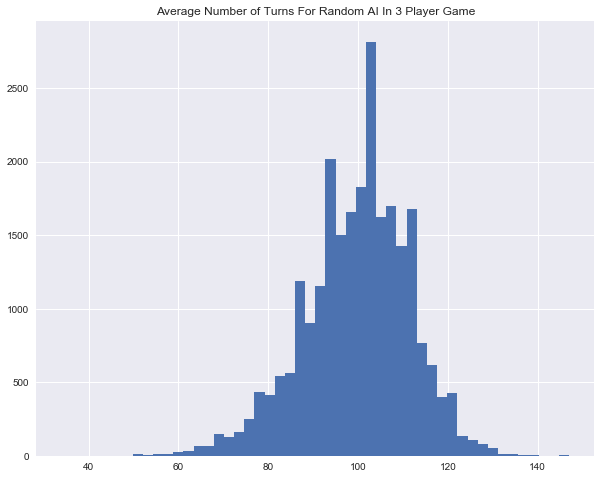

In [40]:
plt.figure(figsize=(10,8))
plt.hist(turnsToComplete, bins=50)
plt.title("Average Number of Turns For Random AI In 3 Player Game")
plt.plot()

[]

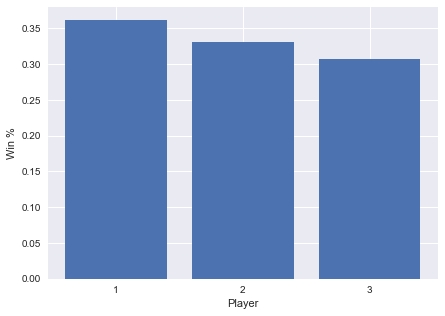

In [57]:
from collections import Counter
c = Counter(victor)
plt.figure(figsize=(7,5))
plt.bar(x=[1, 2, 3],height=[freq/numSims for i,freq in c.items()])
plt.xticks([1, 2, 3])
plt.xlabel("Player")
plt.ylabel("Win %")
plt.plot()

[]

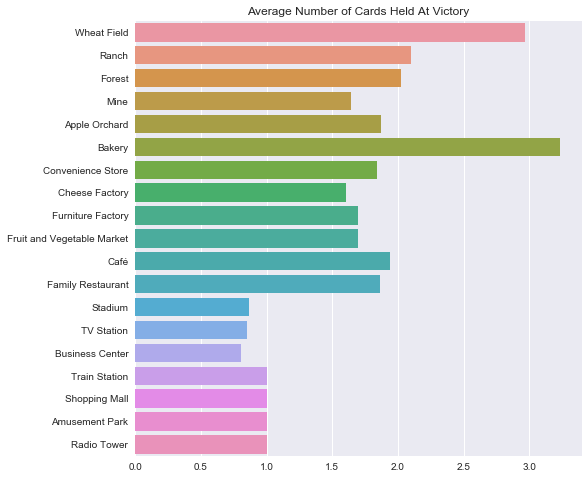

In [104]:
victorCardFreq = np.zeros(19)
for (i, vcs) in enumerate(victorCardSet):
    victorCardFreq += np.array(vcs)

plt.figure(figsize=(8,8))

card_names = [card["card_name"] for card in game_db["card_props"]]
sns.barplot(y=card_names,x=victorCardFreq/numSims, orient="h")
plt.title("Average Number of Cards Held At Victory")
plt.plot()

[]

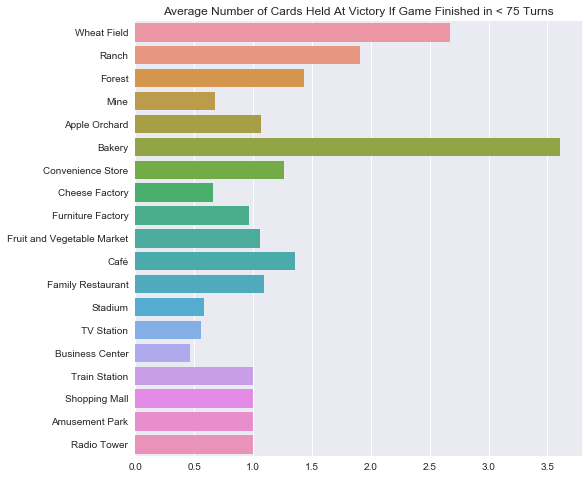

In [105]:
victorCardFreq = np.zeros(19)

subsetOfGames = 0

for (i, vcs) in enumerate(victorCardSet):
    if(turnsToComplete[i] < 75):
        victorCardFreq += np.array(vcs)
        subsetOfGames += 1

plt.figure(figsize=(8,8))

card_names = [card["card_name"] for card in game_db["card_props"]]
sns.barplot(y=card_names,x=victorCardFreq/subsetOfGames, orient="h")
plt.title("Average Number of Cards Held At Victory If Game Finished in < 75 Turns")
plt.plot()